<a href="https://colab.research.google.com/github/EarvinColumna/CpE-AIDA-Lab-02/blob/main/AIDAX_Lab_4_Correlation_and_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIDAX Group Members:
- Cinence, Gwynuelle D.
- Columna, Earvin Deejay P. 
- Hubilla, Jerome B.
- Marcelo, Ramela Jean F.


# Correlation and Autocorrelation
> A Summary of lecture "Time Series Analysis in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: images/dji_ufo.png

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to Course


### A "Thin" Application of Time Series
[Google Trends](https://trends.google.com/trends/) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet". A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

- Preprocess

In [ ]:
from google.colab import files
upload = files.upload()

movie = pd.read_csv('movie_metadata_cleaned.csv')
movie

Saving movie_metadata_cleaned.csv to movie_metadata_cleaned (8).csv


,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,The Following,Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,359.0,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0
5040,5040,A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,3.0,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0
5041,5041,Shanghai Calling,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0
5042,5042,My Date with Drew,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0


In [ ]:
movie_data = movie[movie["actor_1_name"] == 'Gerard Butler']
mov = pd.DataFrame(movie_data, columns=['title_year', 'gross'])
mov

,title_year,gross
93,2010.0,217387997.0
162,2014.0,176997107.0
163,2016.0,31141074.0
379,2003.0,65653758.0
599,2013.0,98895417.0
709,2006.0,210592590.0
762,2016.0,62401264.0
880,2004.0,51225796.0
907,2009.0,73343413.0
1026,2009.0,20488579.0


                  gross
title_year             
2010-01-01  217387997.0
2014-01-01  176997107.0
2016-01-01   31141074.0
2003-01-01   65653758.0
2013-01-01   98895417.0
2006-01-01  210592590.0
2016-01-01   62401264.0
2004-01-01   51225796.0
2009-01-01   73343413.0
2009-01-01   20488579.0
2010-01-01   67061228.0
2009-01-01   88915214.0
2008-01-01   48006503.0
2012-01-01   13101142.0
2007-01-01   53680848.0
2011-01-01     537580.0
2000-01-01   33000377.0
2012-01-01    6002756.0
2005-01-01     375474.0
2007-01-01          0.0
2011-01-01     756452.0
2004-01-01    1340891.0


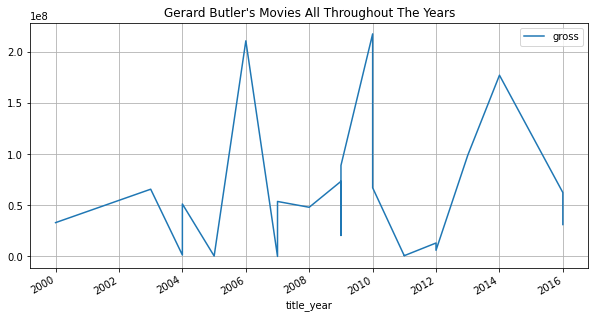

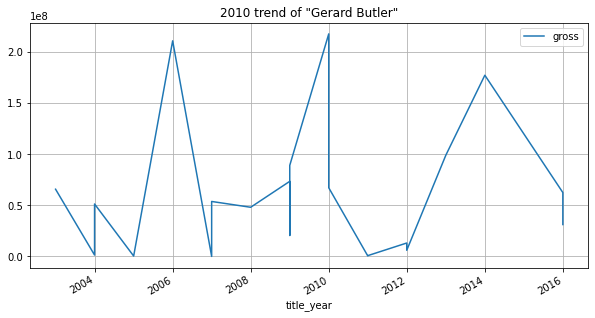

In [ ]:
# Convert the date index to datetime
mov['title_year'] = pd.to_datetime(mov['title_year'], format='%Y')
gerard_butler = mov.set_index('title_year')
print(gerard_butler)

# Plot the entire time series diet and show gridlines
gerard_butler.plot(grid = True);
plt.title("Gerard Butler's Movies All Throughout The Years");

gerard_butler_2010 = gerard_butler[gerard_butler.index.year > 2000]

# Plot 2010 data
gerard_butler_2010.plot(grid = True);
plt.title('2010 trend of "Gerard Butler"');

### Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas ```.join()``` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.
Stock prices and 10-year US Government bond yields is downloaded from [FRED](https://fred.stlouisfed.org/)


- Preprocess

In [ ]:
movie_data_gerard = movie[movie["actor_1_name"] == 'Gerard Butler']
mov_gerard = pd.DataFrame(movie_data_gerard, columns=['title_year'])
movie_data_christian = movie[movie["actor_1_name"] == 'Christian Bale']
mov_christian = pd.DataFrame(movie_data_christian, columns=['title_year'])
print(mov_gerard)
print(mov_christian)

      title_year
93        2010.0
162       2014.0
163       2016.0
379       2003.0
599       2013.0
709       2006.0
762       2016.0
880       2004.0
907       2009.0
1026      2009.0
1139      2010.0
1340      2009.0
1372      2008.0
1521      2012.0
1636      2007.0
1726      2011.0
1774      2000.0
2312      2012.0
2335      2005.0
2347      2007.0
3223      2011.0
3835      2004.0
      title_year
44        2009.0
66        2008.0
120       2005.0
159       2014.0
327       2011.0
769       2002.0
832       2001.0
839       1995.0
901       2000.0
1052      2007.0
1233      2006.0
1699      2005.0
2047      2004.0
2126      2013.0
2319      2007.0
2329      2002.0
2625      1994.0
3029      2010.0
3186      2006.0
3308      1998.0
3383      2000.0
3779      2004.0
3891      2014.0


In [ ]:
mov_gerard['title_year'] = pd.to_datetime(mov_gerard['title_year'], format='%Y')
gerard_butler_index = mov_gerard.set_index('title_year')

mov_christian['title_year'] = pd.to_datetime(mov_christian['title_year'], format='%Y')
christian_bale_index = mov_christian.set_index('title_year')

print(gerard_butler_index)
print(christian_bale_index)

Empty DataFrame
Columns: []
Index: [2010-01-01 00:00:00, 2014-01-01 00:00:00, 2016-01-01 00:00:00, 2003-01-01 00:00:00, 2013-01-01 00:00:00, 2006-01-01 00:00:00, 2016-01-01 00:00:00, 2004-01-01 00:00:00, 2009-01-01 00:00:00, 2009-01-01 00:00:00, 2010-01-01 00:00:00, 2009-01-01 00:00:00, 2008-01-01 00:00:00, 2012-01-01 00:00:00, 2007-01-01 00:00:00, 2011-01-01 00:00:00, 2000-01-01 00:00:00, 2012-01-01 00:00:00, 2005-01-01 00:00:00, 2007-01-01 00:00:00, 2011-01-01 00:00:00, 2004-01-01 00:00:00]
Empty DataFrame
Columns: []
Index: [2009-01-01 00:00:00, 2008-01-01 00:00:00, 2005-01-01 00:00:00, 2014-01-01 00:00:00, 2011-01-01 00:00:00, 2002-01-01 00:00:00, 2001-01-01 00:00:00, 1995-01-01 00:00:00, 2000-01-01 00:00:00, 2007-01-01 00:00:00, 2006-01-01 00:00:00, 2005-01-01 00:00:00, 2004-01-01 00:00:00, 2013-01-01 00:00:00, 2007-01-01 00:00:00, 2002-01-01 00:00:00, 1994-01-01 00:00:00, 2010-01-01 00:00:00, 2006-01-01 00:00:00, 1998-01-01 00:00:00, 2000-01-01 00:00:00, 2004-01-01 00:00:00, 2014

In [ ]:
# Convert the stock index and bond index into sets
set_gerard_dates = set(gerard_butler_index.index)
set_christian_dates = set(christian_bale_index.index)

# Take the difference between the sets and print
print(set_gerard_dates - set_christian_dates)

# Merge stocks and bonds DataFrame using join()
gerard_and_christian = gerard_butler_index.join(christian_bale_index, how = 'inner')

{Timestamp('2003-01-01 00:00:00'), Timestamp('2012-01-01 00:00:00'), Timestamp('2016-01-01 00:00:00')}


## Correlation of Two Time Series


### Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

In [ ]:
movie_data = movie[movie["actor_1_name"] == 'Gerard Butler']
mov = pd.DataFrame(movie_data, columns=['title_year', 'gross','budget'])
mov['title_year'] = pd.to_datetime(mov['title_year'], format='%Y')
mov1 = mov.set_index('title_year')
mov1

,gross,budget
title_year,,
2010-01-01,217387997.0,165000000.0
2014-01-01,176997107.0,145000000.0
2016-01-01,31141074.0,140000000.0
2003-01-01,65653758.0,95000000.0
2013-01-01,98895417.0,70000000.0
2006-01-01,210592590.0,65000000.0
2016-01-01,62401264.0,60000000.0
2004-01-01,51225796.0,70000000.0
2009-01-01,73343413.0,50000000.0


                gross    budget
title_year                     
2010-01-01        NaN       NaN
2014-01-01  -0.185801 -0.121212
2016-01-01  -0.824059 -0.034483
2003-01-01   1.108269 -0.321429
2013-01-01   0.506318 -0.263158
2006-01-01   1.129447 -0.071429
2016-01-01  -0.703687 -0.076923
2004-01-01  -0.179090  0.166667
2009-01-01   0.431767 -0.285714
2009-01-01  -0.720649  0.000000
2010-01-01   2.273103 -0.200000
2009-01-01   0.325881 -0.050000
2008-01-01  -0.460087 -0.026316
2012-01-01  -0.727097 -0.054054
2007-01-01   3.097417 -0.142857
2011-01-01  -0.989986  0.000000
2000-01-01  60.386914 -0.066667
2012-01-01  -0.818100 -0.285714
2005-01-01  -0.937450  0.000000
2007-01-01  -1.000000  0.000000
2011-01-01        inf -1.000000
2004-01-01   0.772606       NaN
Correlation of Gerard Butler's Gross and Budget from Movies:  nan


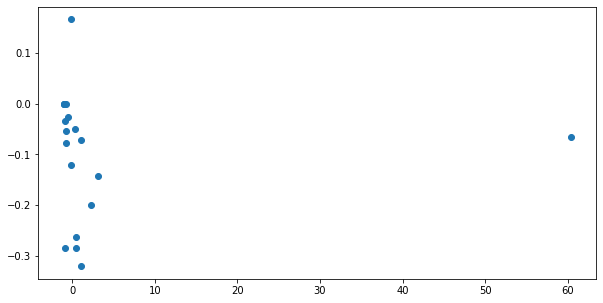

In [ ]:
# Compute percent change using pct_change()
returns = mov1.pct_change()
print(returns)

# Compute correlation using corr()
correlation = returns['gross'].corr(returns['budget'])
print("Correlation of Gerard Butler's Gross and Budget from Movies: ", correlation)

# Make scatter plot
plt.scatter(returns['gross'], returns['budget']);

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

### Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

UFO data was downloaded from [www.nuforc.org](www.nuforc.org).

- Preprocess

In [ ]:
movie_data_gerard = movie[movie["actor_1_name"] == 'Gerard Butler']
mov_gerard = pd.DataFrame(movie_data_gerard, columns=['title_year', 'gross', 'num_critic_for_reviews' ])
print(mov_gerard)

      title_year        gross  num_critic_for_reviews
93        2010.0  217387997.0                   288.0
162       2014.0  176997107.0                   292.0
163       2016.0   31141074.0                   184.0
379       2003.0   65653758.0                   157.0
599       2013.0   98895417.0                   358.0
709       2006.0  210592590.0                   460.0
762       2016.0   62401264.0                   225.0
880       2004.0   51225796.0                   153.0
907       2009.0   73343413.0                   216.0
1026      2009.0   20488579.0                   180.0
1139      2010.0   67061228.0                   161.0
1340      2009.0   88915214.0                   174.0
1372      2008.0   48006503.0                   139.0
1521      2012.0   13101142.0                   135.0
1636      2007.0   53680848.0                   131.0
1726      2011.0     537580.0                   134.0
1774      2000.0   33000377.0                   122.0
2312      2012.0    6002756.

In [ ]:
mov_gerard['title_year'] = pd.to_datetime(mov_gerard['title_year'], format='%Y')
mov_index = mov_gerard.set_index('title_year')
print(mov_index)

                  gross  num_critic_for_reviews
title_year                                     
2010-01-01  217387997.0                   288.0
2014-01-01  176997107.0                   292.0
2016-01-01   31141074.0                   184.0
2003-01-01   65653758.0                   157.0
2013-01-01   98895417.0                   358.0
2006-01-01  210592590.0                   460.0
2016-01-01   62401264.0                   225.0
2004-01-01   51225796.0                   153.0
2009-01-01   73343413.0                   216.0
2009-01-01   20488579.0                   180.0
2010-01-01   67061228.0                   161.0
2009-01-01   88915214.0                   174.0
2008-01-01   48006503.0                   139.0
2012-01-01   13101142.0                   135.0
2007-01-01   53680848.0                   131.0
2011-01-01     537580.0                   134.0
2000-01-01   33000377.0                   122.0
2012-01-01    6002756.0                   116.0
2005-01-01     375474.0                 

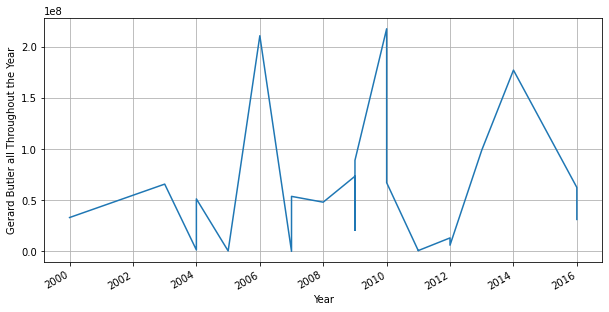

In [ ]:
mov_index.gross.plot(grid = True);
plt.xlabel('Year');
plt.ylabel('Gerard Butler all Throughout the Year');

In [ ]:
# Compute correlation o f levels
correlation1 = mov_gerard['gross'].corr(mov_gerard['num_critic_for_reviews'])
print("Correlation of levels: ", correlation1)

# Compute correlation fo percent changes
changes = mov_index.pct_change()
correlation2 = changes['gross'].corr(changes['num_critic_for_reviews'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.8192092681016562
Correlation of changes:  nan


## Simple Linear Regression
- What is a Regression?
    - Simple linear regression: $y_t = \alpha + \beta x_t + \epsilon_t$
- Relationship between R-Squared and Correlation
    - $[corr(x, y)]^2 = R^2$
    - $sign(corr) = sign(\text{regression slope})$

### Looking at a Regression's R-Squared
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package ```statsmodels```, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, ```x``` and ```y```, compute their correlation, and then regress ```y``` on ```x``` using the function ```OLS(y,x)``` in the ```statsmodels.api``` library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the $\alpha$ in the regression $y_t = \alpha + \beta x_t + \epsilon_t$). To include a constant using the function ```OLS()```, you need to add a column of 1's to the right hand side of the regression.

- Preprocess

In [ ]:
movie_data_gerard = movie[movie["actor_1_name"] == 'Gerard Butler']
mov_gerard = pd.DataFrame(movie_data_gerard, columns=['title_year', 'gross','budget'])

x = mov_gerard.reset_index(drop=True)['gross']
y = mov_gerard.reset_index(drop=True)['budget']
print(x)
print(y)

0     217387997.0
1     176997107.0
2      31141074.0
3      65653758.0
4      98895417.0
5     210592590.0
6      62401264.0
7      51225796.0
8      73343413.0
9      20488579.0
10     67061228.0
11     88915214.0
12     48006503.0
13     13101142.0
14     53680848.0
15       537580.0
16     33000377.0
17      6002756.0
18       375474.0
19            0.0
20       756452.0
21      1340891.0
Name: gross, dtype: float64
0     165000000.0
1     145000000.0
2     140000000.0
3      95000000.0
4      70000000.0
5      65000000.0
6      60000000.0
7      70000000.0
8      50000000.0
9      50000000.0
10     40000000.0
11     38000000.0
12     37000000.0
13     35000000.0
14     30000000.0
15     30000000.0
16     28000000.0
17     20000000.0
18     20000000.0
19     20000000.0
20            0.0
21            0.0
Name: budget, dtype: float64


In [ ]:
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" % (correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['gross'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is 0.70
                            OLS Regression Results                            
Dep. Variable:                 budget   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     19.03
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000301
Time:                        18:14:24   Log-Likelihood:                -411.05
No. Observations:                  22   AIC:                             826.1
Df Residuals:                      20   BIC:                             828.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Autocorrelation
- Correlation of a time series with a lagged copy of itself
- Lag-one autocorrelation
- Also called **serial correlation**

### A Popular Strategy Using Autocorrelation
One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see [here](https://www.quantopian.com/posts/enhancing-short-term-mean-reversion-strategies-1).

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame ```MSFT``` of daily prices. You should use the ```.resample()``` method to get weekly prices and then compute returns from prices. Use the pandas method ```.autocorr()``` to get the autocorrelation and show that the autocorrelation is negative. Note that the ```.autocorr()``` method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

- Preprocess

In [ ]:
movie_data = movie[movie["actor_1_name"] == 'Gerard Butler']
mov2 = pd.DataFrame(movie_data, columns=['title_year', 'gross'])
mov2['title_year'] = pd.to_datetime(mov2['title_year'], format='%Y')
butler = mov2.set_index('title_year')
butler1 = pd.DataFrame(gerard_butler)
butler1

,gross
title_year,
2010-01-01,217387997.0
2014-01-01,176997107.0
2016-01-01,31141074.0
2003-01-01,65653758.0
2013-01-01,98895417.0
2006-01-01,210592590.0
2016-01-01,62401264.0
2004-01-01,51225796.0
2009-01-01,73343413.0


In [ ]:
# Convert the data to Weekly data
# Note: Data cannot be converted to weekly since year was given on the dataset.
butler2 = butler1.resample(rule='A').last()

# Compute the percentage change of prices
returns = butler2.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['gross'].autocorr()
print('The auto correlation of weekly returns is %4.2f' % (autocorrelation))

The auto correlation of weekly returns is  nan


### Are Interest Rates Autocorrelated?
When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

- Preprocess

In [ ]:
movie_data = movie[movie["actor_1_name"] == 'Gerard Butler']
mov2 = pd.DataFrame(movie_data, columns=['title_year', 'gross'])
mov2['title_year'] = pd.to_datetime(mov2['title_year'], format='%Y')
butler = mov2.set_index('title_year')
butler1 = pd.DataFrame(gerard_butler)
butler1

,gross
title_year,
2010-01-01,217387997.0
2014-01-01,176997107.0
2016-01-01,31141074.0
2003-01-01,65653758.0
2013-01-01,98895417.0
2006-01-01,210592590.0
2016-01-01,62401264.0
2004-01-01,51225796.0
2009-01-01,73343413.0


In [ ]:
# Compute the daily change in interest rates
daily_diff = butler1.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['gross'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = butler1.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['gross'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is -0.27
The autocorrelation of annual interest rate changes is -0.41
